In [2]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

import parameter_tuning as pt

%load_ext autoreload
%autoreload 2

In [30]:
sns.set_style("ticks", {'font.family':'sans-serif', 
               'font.sans-serif':['CMU Serif'],
               'size': 11})

In [100]:
colors_short = [(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.7972318339100346, 0.20092272202998845, 0.3008073817762399, 1.0),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.9966935793925413, 0.8975009611687812, 0.5770857362552863, 1.0),
 (1.0, 0.9803921568627451, 0.5529411764705883, 1.0)]

colors_long = [(1.0, 0.9803921568627451, 0.5529411764705883, 1.0),
 (0.9173394848135333, 0.9669357939254134, 0.6200692041522493, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0),
 (0.3280276816608997, 0.6805074971164936, 0.6802768166089965, 1.0),
 (0.2265282583621684, 0.4938869665513264, 0.7224913494809688, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

In [3]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.1,
              'IF': -500,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'Iinit': 1.02,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 500,
              'delay': 500}

# CV

In [14]:
sigma_lst = [0,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.05,0.06,0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25]

In [136]:
import matplotlib as mpl
jet = cm = plt.get_cmap('Blues') 
cNorm  = mpl.colors.Normalize(vmin=-5, vmax=len(sigma_lst)-1)
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)

colors = []
for i in range(len(sigma_lst)):
    colors.append(scalarMap.to_rgba(i))

In [23]:
K = 6

stds_s_mean = []
for sigma in sigma_lst:
    stds_si = []
    for i in range(11):
        params = Params(ntrials=500, delay=700, tau=70, sigma=sigma, th=0.1, Iinit=1.02, IF=-500)
        expsim = ExperimentSimulation(params)
        exp_result = expsim.simulate(stimulus_lst_short, K)
        beh_result = exp_result.create_behavioral_data()
        stds_si.append(beh_result.production_stds)
    stds_s_mean.append(np.mean(stds_si, axis=0))

In [24]:
K = 4
stds_l_mean = []

for sigma in sigma_lst:
    stds_li = []
    for i in range(11):
        params = Params(ntrials=500, delay=700, tau=70, sigma=sigma, th=0.1, Iinit=1.02, IF=-500)
        expsim = ExperimentSimulation(params)
        exp_result = expsim.simulate(stimulus_lst_long, K)
        beh_result = exp_result.create_behavioral_data()
        stds_li.append(beh_result.production_stds)
    stds_l_mean.append(np.mean(stds_li, axis=0))

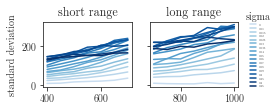

In [137]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(3.5,1.2))
ax[0].set_prop_cycle(color=colors)
ax[1].set_prop_cycle(color=colors)

for lst, sigma in zip(stds_s_mean, sigma_lst):
    ax[0].plot(stimulus_range_s, lst, label=str(sigma))
ax[0].set_title('short range')
ax[0].set_ylabel('standard deviation')

for lst, sigma in zip(stds_l_mean, sigma_lst):
    ax[1].plot(stimulus_range_l, lst, label=str(sigma))
ax[1].set_title('long range')

ax[1].legend(bbox_to_anchor=(1.05, 1.2), title='sigma', frameon=False,  prop={'size': 3.2})

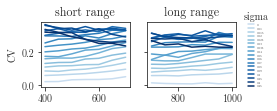

In [138]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(3.5,1.2))
ax[0].set_prop_cycle(color=colors)
ax[1].set_prop_cycle(color=colors)

for lst, sigma in zip(np.array(stds_s_mean)/np.array(stimulus_range_s), sigma_lst):
    ax[0].plot(stimulus_range_s, lst, label=str(sigma))
ax[0].set_title('short range')
ax[0].set_ylabel('CV')

for lst, sigma in zip(np.array(stds_l_mean)/np.array(stimulus_range_l), sigma_lst):
    ax[1].plot(stimulus_range_l, lst, label=str(sigma))
ax[1].set_title('long range')

ax[1].legend(bbox_to_anchor=(1.05, 1.2), title='sigma', frameon=False,  prop={'size': 3.2})

In [97]:
np.mean(np.array(stds_s_mean)/np.array(stimulus_range_s), axis=1)

array([0.03231756, 0.07233498, 0.10175477, 0.12902306, 0.1560583 ,
       0.18569901, 0.20691687, 0.23060062, 0.26061123, 0.28955208,
       0.30873402, 0.32615604, 0.32956567, 0.34215565, 0.32900818,
       0.28964721, 0.27711118])

In [98]:
np.mean(np.array(stds_l_mean)/np.array(stimulus_range_l), axis=1)

array([0.00961666, 0.06200795, 0.09030722, 0.11544446, 0.14391573,
       0.16667739, 0.19039589, 0.20511297, 0.24091831, 0.26427625,
       0.28494772, 0.29048722, 0.30042289, 0.30503873, 0.29233575,
       0.26544002, 0.23942923])

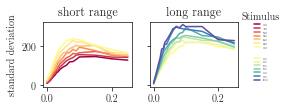

In [128]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(3.5,1.2))
ax[0].set_prop_cycle(color=colors_short)
ax[1].set_prop_cycle(color=colors_long)

for lst, stimulus in zip(np.array(stds_s_mean).T, stimulus_range_s):
    ax[0].plot(sigma_lst, lst, label=str(stimulus))
ax[0].set_title('short range')
ax[0].set_ylabel('standard deviation')

for lst, stimulus in zip(np.array(stds_l_mean).T, stimulus_range_l):
    ax[1].plot(sigma_lst, lst, label=str(stimulus))
ax[1].set_title('long range')

ax[1].legend(bbox_to_anchor=(1.37, 0.5), frameon=False,  prop={'size': 3})
ax[0].legend(bbox_to_anchor=(2.7, 1.2), title='Stimulus',frameon=False,  prop={'size': 3.2})

# Parameter Space (K 1-18, sigma = 0.02)

In [142]:
K_lst = np.arange(1, 18, .5)
tau = np.arange(20, 150, 10)

print(len(K_lst), len(tau))

34 13


In [140]:
path = '../results/highI/'
short_ktau005, long_ktau005 = pt.load_data(path+'SHORT_K1-18_TAU_th005_del700_sig02_fixed_seed-20220728-142415-output.pickle',
                                      path+'LONG_K1-18_TAU_th005_del700_sig02_fixed_seed-20220728-144322-output.pickle')
short_ktau01, long_ktau01 = pt.load_data(path+'SHORT_K1-18_TAU_th01_del700_sig02_fixed_seed-20220728-163715-output.pickle',
                                      path+'LONG_K1-18_TAU_th01_del700_sig02_fixed_seed-20220728-151344-output.pickle')
short_ktau02, long_ktau02 = pt.load_data(path+'SHORT_K1-18_TAU_th02_del700_sig02_fixed_seed-20220728-170122-output.pickle',
                                      path+'LONG_K1-18_TAU_th02_del700_sig02_fixed_seed-20220728-172135-output.pickle')

threshold 0.05
-16062.114671099318 19933.32759783507


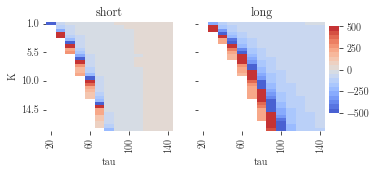

threshold 0.1
-211918.12565901506 11980.539788417032


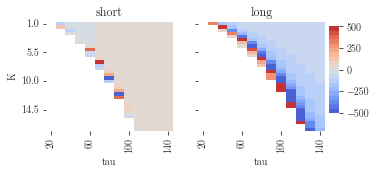

threshold 0.2
-2310.984768009957 37855.45275679445


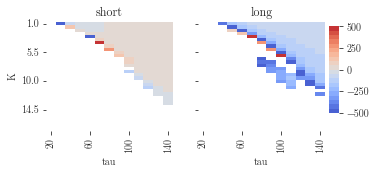

In [143]:
print('threshold', 0.05)
pt.plot_ind_point(short_ktau005, long_ktau005, K_lst, tau)
print('threshold', 0.1)
pt.plot_ind_point(short_ktau01, long_ktau01, K_lst, tau)
print('threshold', 0.2)
pt.plot_ind_point(short_ktau02, long_ktau02, K_lst, tau)

threshold 0.05
-0.537493639689802 1.4094318275868232


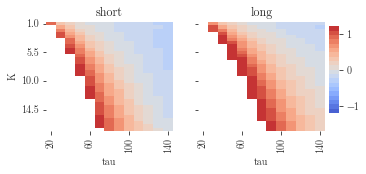

threshold 0.1
-0.6844848240921729 1.5427807155504356


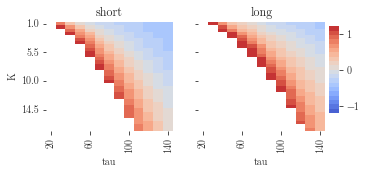

threshold 0.2
-0.5872522429896841 1.3630887522191868


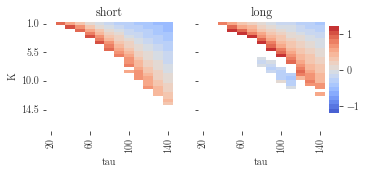

In [144]:
print('threshold', 0.05)
pt.plot_slope(short_ktau005, long_ktau005, K_lst, tau)
print('threshold', 0.1)
pt.plot_slope(short_ktau01, long_ktau01, K_lst, tau)
print('threshold', 0.2)
pt.plot_slope(short_ktau02, long_ktau02, K_lst, tau)

threshold 0.05
7065.546650319062 88082.70788263602


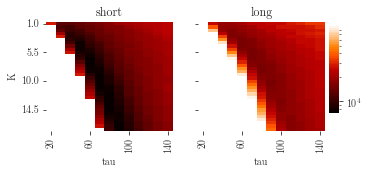

80 13.0
[(20, 1.0), (30, 1.5), (40, 3.0), (50, 4.5), (60, 6.5), (70, 9.5), (80, 13.0), (90, 17.0), (100, 17.5), (110, 17.5), (120, 17.5), (130, 17.5), (140, 17.0)]
60 4.0
[(20, 1.0), (30, 1.0), (40, 1.5), (50, 2.5), (60, 4.0), (70, 6.0), (80, 8.0), (90, 10.5), (100, 13.5), (110, 16.5), (120, 17.5), (130, 17.5), (140, 17.5)]
threshold 0.1
6119.784776022608 81508.8438153383


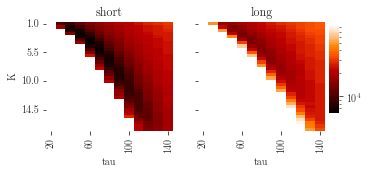

60 4.0
[(20, 1.0), (30, 1.0), (40, 1.5), (50, 2.5), (60, 4.0), (70, 5.0), (80, 6.5), (90, 9.0), (100, 11.0), (110, 12.5), (120, 15.5), (130, 16.5), (140, 16.5)]
60 2.5
[(20, 1.0), (30, 1.0), (40, 1.0), (50, 1.5), (60, 2.5), (70, 3.5), (80, 5.0), (90, 6.5), (100, 8.0), (110, 8.5), (120, 12.0), (130, 11.5), (140, 15.0)]
threshold 0.2
8376.158655624911 282949.6635435075


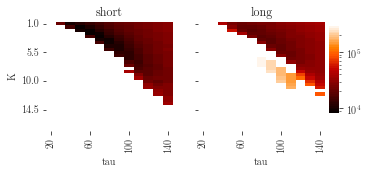

60 2.0
[(20, 1.0), (30, 1.0), (40, 1.0), (50, 1.5), (60, 2.0), (70, 3.0), (80, 3.5), (90, 4.5), (100, 6.0), (110, 7.0), (120, 7.5), (130, 8.0), (140, 8.5)]
80 3.0
[(20, 1.0), (30, 1.0), (40, 1.0), (50, 1.0), (60, 1.5), (70, 2.0), (80, 3.0), (90, 4.0), (100, 5.0), (110, 6.0), (120, 6.5), (130, 6.5), (140, 8.5)]


In [147]:
print('threshold', 0.05)
pt.plot_mse(short_ktau005, long_ktau005, K_lst, tau)
print(pt.get_opt_K(short_ktau005, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau005, K_lst, tau, mse=True))

print('threshold', 0.1)
pt.plot_mse(short_ktau01, long_ktau01, K_lst, tau)
print(pt.get_opt_K(short_ktau01, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau01, K_lst, tau, mse=True))

print('threshold', 0.2)
pt.plot_mse(short_ktau02, long_ktau02, K_lst, tau)
print(pt.get_opt_K(short_ktau02, K_lst, tau, mse=True))
print(pt.get_opt_K(long_ktau02, K_lst, tau, mse=True))

0.6662345335174898
0.6344308933914342


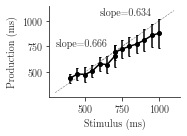

In [153]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=70, sigma=0.02, th=0.05, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.7,2))

K = 9.5
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

K = 6
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
#plt.savefig('../report/figures/interI_beh.png', dpi=500, bbox_inches='tight')

0.7435234052290461
0.6245453124097625


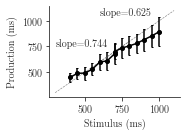

In [152]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=60, sigma=0.02, th=0.1, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.7,2))

K = 4
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

K = 2.5
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
#plt.savefig('../report/figures/interI_beh.png', dpi=500, bbox_inches='tight')

0.6236449065697234
0.5039008029234552


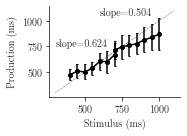

In [155]:
np.random.seed(0)
params = Params(ntrials=500, delay=700, tau=70, sigma=0.02, th=0.2, Iinit=1.02, IF=-500)
expsim = ExperimentSimulation(params)

fig, ax = plt.subplots(1,1, figsize=(2.7,2))

K = 3
exp_result = expsim.simulate(stimulus_lst_short, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

K = 2
exp_result = expsim.simulate(stimulus_lst_long, K)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior(ax)
print(exp_result.create_behavioral_data().slope)

ax.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

plt.tight_layout()
#plt.savefig('../report/figures/interI_beh.png', dpi=500, bbox_inches='tight')

threshold 0.05
-86.78400623982978 27.57627816691791


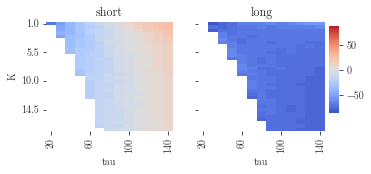

110 7.5
[(20, 1.0), (30, 2.5), (40, 5.0), (50, 6.0), (60, 1.0), (70, 1.0), (80, 1.0), (90, 1.0), (100, 2.0), (110, 7.5), (120, 16.0), (130, 17.0), (140, 16.0)]
130 1.0
[(20, 1.0), (30, 1.5), (40, 3.5), (50, 5.5), (60, 8.0), (70, 1.0), (80, 1.0), (90, 1.0), (100, 1.0), (110, 1.0), (120, 1.0), (130, 1.0), (140, 1.0)]
threshold 0.1
-126.61182541770417 36.82388311610604


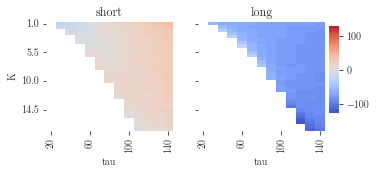

70 2.5
[(20, 1.0), (30, 1.5), (40, 2.5), (50, 3.5), (60, 4.0), (70, 2.5), (80, 4.0), (90, 12.5), (100, 15.0), (110, 17.0), (120, 17.5), (130, 17.5), (140, 17.5)]
60 4.5
[(20, 1.0), (30, 1.0), (40, 2.0), (50, 3.0), (60, 4.5), (70, 6.0), (80, 7.5), (90, 9.0), (100, 1.0), (110, 1.0), (120, 1.0), (130, 1.0), (140, 1.0)]
threshold 0.2
-510.9443377017384 27.800055871530805


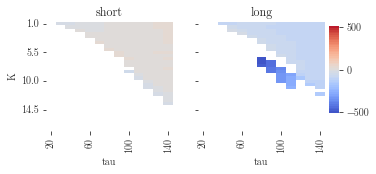

70 2.0
[(20, 1.0), (30, 1.0), (40, 1.5), (50, 2.0), (60, 2.0), (70, 2.0), (80, 1.0), (90, 1.0), (100, 2.5), (110, 8.5), (120, 10.0), (130, 10.5), (140, 12.0)]
50 2.0
[(20, 1.0), (30, 1.0), (40, 1.0), (50, 2.0), (60, 2.5), (70, 3.0), (80, 4.0), (90, 5.0), (100, 6.0), (110, 6.5), (120, 7.5), (130, 6.5), (140, 4.0)]


In [156]:
print('threshold', 0.05)
pt.plot_mse(short_ktau005, long_ktau005, K_lst, tau, 'bias')
print(pt.get_opt_K(short_ktau005, K_lst, tau, bias=True))
print(pt.get_opt_K(long_ktau005, K_lst, tau, bias=True))

print('threshold', 0.1)
pt.plot_mse(short_ktau01, long_ktau01, K_lst, tau, 'bias')
print(pt.get_opt_K(short_ktau01, K_lst, tau, bias=True))
print(pt.get_opt_K(long_ktau01, K_lst, tau, bias=True))

print('threshold', 0.2)
pt.plot_mse(short_ktau02, long_ktau02, K_lst, tau, 'bias')
print(pt.get_opt_K(short_ktau02, K_lst, tau, bias=True))
print(pt.get_opt_K(long_ktau02, K_lst, tau, bias=True))

threshold 0.05
3260.6949577821356 81152.44955633975


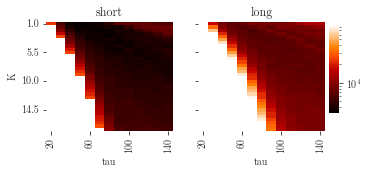

-86.78400623982978 27.57627816691791


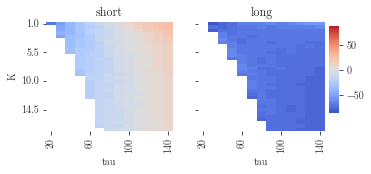

110 7.5
[(20, 1.0), (30, 2.5), (40, 5.0), (50, 6.0), (60, 1.0), (70, 1.0), (80, 1.0), (90, 1.0), (100, 2.0), (110, 7.5), (120, 16.0), (130, 17.0), (140, 16.0)]
130 1.0
[(20, 1.0), (30, 1.5), (40, 3.5), (50, 5.5), (60, 8.0), (70, 1.0), (80, 1.0), (90, 1.0), (100, 1.0), (110, 1.0), (120, 1.0), (130, 1.0), (140, 1.0)]


In [146]:
print('threshold', 0.05)
pt.plot_mse(short_ktau005, long_ktau005, K_lst, tau, 'var')
pt.plot_mse(short_ktau005, long_ktau005, K_lst, tau, 'bias')

print(pt.get_opt_K(short_ktau005, K_lst, tau, bias=True))
print(pt.get_opt_K(long_ktau005, K_lst, tau, bias=True))

threshold 0.05
252633.75050709938 605720.408


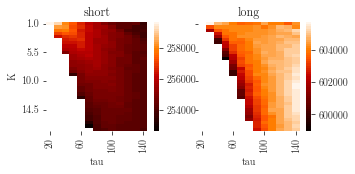

threshold 0.1
249276.46232179226 610671.1739130435


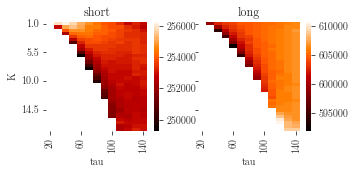

threshold 0.2
248655.1724137931 672647.2397540984


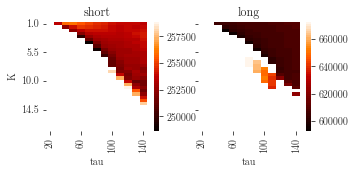

In [148]:
print('threshold', 0.05)
pt.plot_mse_total(short_ktau005, long_ktau005, K_lst, tau)
print('threshold', 0.1)
pt.plot_mse_total(short_ktau01, long_ktau01, K_lst, tau)
print('threshold', 0.2)
pt.plot_mse_total(short_ktau02, long_ktau02, K_lst, tau)

### reset unsymmetric